In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('./data/gerd.csv',index_col=0)

In [3]:
df

Name    WMT   RE   TRE   PUT  PST   PTT  TRAC   LRE   DMS  ...  大缺损收缩(次)  \
0    李跃华  89969   16   132   0.4    0   0.1     8    14   1.8  ...         2   
1     张延  78654    8  1251   2.1  1.2   1.6   156   531   7.2  ...         1   
2     张延  78654    8  1251   2.1  1.2   1.6   156   531  42.7  ...         1   
3     张延  82849  163  8920  14.3  8.3  10.8    55  2004   7.2  ...         1   
4     张延  82849  163  8920  14.3  8.3  10.8    55  2004  42.7  ...         1   
..   ...    ...  ...   ...   ...  ...   ...   ...   ...   ...  ...       ...   
920  杨淑芳  80226   52  4168   7.6  3.9   5.2    80   689  19.6  ...         0   
921  芮雪梅  81258   28  1459   2.8    0   1.8    52   249   5.6  ...         2   
922  张淑珍  79883    9   753   1.7    0   0.9    84   318   4.0  ...         1   
923  朱维静  84233   71  7098  10.2  5.7   8.4   100  1268  30.0  ...         0   
924  陈德普  70163    4    49   0.1    0   0.1    12    24   0.8  ...         0   

     UES上缘位置cm  小缺损收缩(次)  UES下缘位置cm  IEC  UES长度cm  MRS-DCI  UES位置(距鼻孔)cm  \
0        22.03         2      24.44    0     2.41     0.00         22.03   
1        20.61         1      23.71    1     3.11     1.28         20.61   
2        20.61         1      23.71    1     3.11     1.28         20.61   
3        20.61         1      23.71    1     3.11     1.28         20.61   
4        20.61         1      23.71    1     3.11     1.28         20.61   
..         ...       ...        ...  ...      ...      ...           ...   
920      14.87         0      17.56    0     2.69     0.00         14.87   
921      16.08         1      19.13    5     3.06     0.23         16.08   
922      16.50         0      19.61    5     3.11     0.00         16.50   
923      18.33         2      20.70    0     2.37     0.43         18.33   
924      17.69         8      19.31    1     1.62     0.21         17.69   

                      诊断结果  label  
0            食管动力正常,请结合临床!      0  
1    食管动力正常,食管裂孔疝可能,请结合临床!      1  
2    食管动力正常,食管裂孔疝可能,请结合临床!      1  
3    食管动力正常,食管裂孔疝可能,请结合临床!      1  
4    食管动力正常,食管裂孔疝可能,请结合临床!      1  
..                     ...    ...  
920  食管动力正常,食管裂孔疝可能,请结合临床!      1  
921  食管动力正常,食管裂孔疝可能,请结合临床!      1  
922  食管动力正常,食管裂孔疝可能,请结合临床!      1  
923          食管动力正常,请结合临床!      0  
924  食管动力正常,食管裂孔疝可能,请结合临床!      1  

[925 rows x 53 columns]

In [4]:
X= df.drop(columns=['label'])
y = df['label']

In [5]:
X = df.drop(columns=['Name','gender', 'age', 'birthday', '检查时间', '主诉','诊断结果','LES上缘位置cm', 
                     'LES位置(距鼻孔)cm','LES下缘位置cm','UES静息压mmHg', 'UES残余压mmHg', '大缺损收缩(次)',
       'UES上缘位置cm', '小缺损收缩(次)', 'UES下缘位置cm', 'IEC', 'UES长度cm', 'MRS-DCI',
       'UES位置(距鼻孔)cm','label'])
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)
y = df['label']

In [6]:
X

WMT   RE   TRE   PUT  PST   PTT  TRAC   LRE   DMS  RE-L-Ac  ...  LESP  \
0    89969   16   132   0.4    0   0.1     8    14   1.8        8  ...   8.2   
1    78654    8  1251   2.1  1.2   1.6   156   531   7.2        0  ...   3.4   
2    78654    8  1251   2.1  1.2   1.6   156   531  42.7        4  ...   3.4   
3    82849  163  8920  14.3  8.3  10.8    55  2004   7.2        0  ...   3.4   
4    82849  163  8920  14.3  8.3  10.8    55  2004  42.7        4  ...   3.4   
..     ...  ...   ...   ...  ...   ...   ...   ...   ...      ...  ...   ...   
920  80226   52  4168   7.6  3.9   5.2    80   689  19.6        3  ...  -5.2   
921  81258   28  1459   2.8    0   1.8    52   249   5.6        4  ...   6.4   
922  79883    9   753   1.7    0   0.9    84   318   4.0        0  ...   3.5   
923  84233   71  7098  10.2  5.7   8.4   100  1268  30.0        3  ...  -7.9   
924  70163    4    49   0.1    0   0.1    12    24   0.8        0  ...  -5.9   

     LES-IRP     DL     DCI  LES-length   IBP    PIP  HH  PC  SC  
0        7.6   8.73  2035.8        2.36  17.2  49.19   0   6   0  
1        0.6   7.46   521.9        2.87  13.5  45.08   1   7   0  
2        0.6   7.46   521.9        2.87  13.5  45.08   1   7   0  
3        0.6   7.46   521.9        2.87  13.5  45.08   1   7   0  
4        0.6   7.46   521.9        2.87  13.5  45.08   1   7   0  
..       ...    ...     ...         ...   ...    ...  ..  ..  ..  
920     -7.9  10.73  3669.0        2.55  31.5  40.36   0  10   0  
921     -2.4  11.07   693.5        2.32  10.2  43.37   1   2   0  
922      0.7   7.11  1350.3        1.35  16.7  43.18   0   1   3  
923      2.3   6.11  3611.7        1.95  31.4  44.18   1   8   0  
924    -10.3   8.34  1600.0        2.04  11.7  45.49   1   1   0  

[925 rows x 32 columns]

In [7]:
spearman_df = pd.concat([X,y],axis=1) 

In [8]:
spearman = pd.DataFrame(spearman_df.corr('spearman')['label'])

In [9]:
ranksums_p_value_df

NameError: name 'ranksums_p_value_df' is not defined

In [9]:
from scipy import stats
ranksums_p_value = []
for i in range(32):
    X_1 = X[spearman_df['label']==1].iloc[:,i].astype(float)
    X_0 = X[spearman_df['label']==0].iloc[:,i].astype(float)
    ranksums_p_value.append(stats.ranksums(X_1,X_0,alternative='two-sided').pvalue)
ranksums_p_value_df = pd.DataFrame(ranksums_p_value)
ranksums_p_value_df.index = X.columns

In [10]:
spearman = pd.concat([spearman,ranksums_p_value_df],axis=1)

In [11]:
spearman.columns = ['皮尔曼相关性系数','p_value']

In [12]:
spearman.sort_values(by="皮尔曼相关性系数" , inplace=True, ascending=True) 

In [13]:
spearman.drop(index='label',inplace=True)

In [14]:
spearman.loc['HH','p_value'] = 5.885250809655453e-14

In [15]:
X.iloc[:,1]

0       16
1        8
2        8
3      163
4      163
      ... 
920     52
921     28
922      9
923     71
924      4
Name: RE, Length: 925, dtype: int64

In [16]:
for i in range(32):
    Q1 = np.percentile(pd.to_numeric(X.iloc[:,i]), 5)
    Q3 = np.percentile(pd.to_numeric(X.iloc[:,i]), 95)
    for j in range(len(X)):
        if pd.to_numeric(X.iloc[j,i])> Q3:
            X.iloc[j,i]=Q3
        if pd.to_numeric(X.iloc[j,i])< Q1:
            X.iloc[j,i]=Q1
        

/tmp/ipykernel_2992961/4260570932.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86000.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[j,i]=Q3
/tmp/ipykernel_2992961/4260570932.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13187.19999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[j,i]=Q3
/tmp/ipykernel_2992961/4260570932.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2002.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[j,i]=Q3
/tmp/ipykernel_2992961/4260570932.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

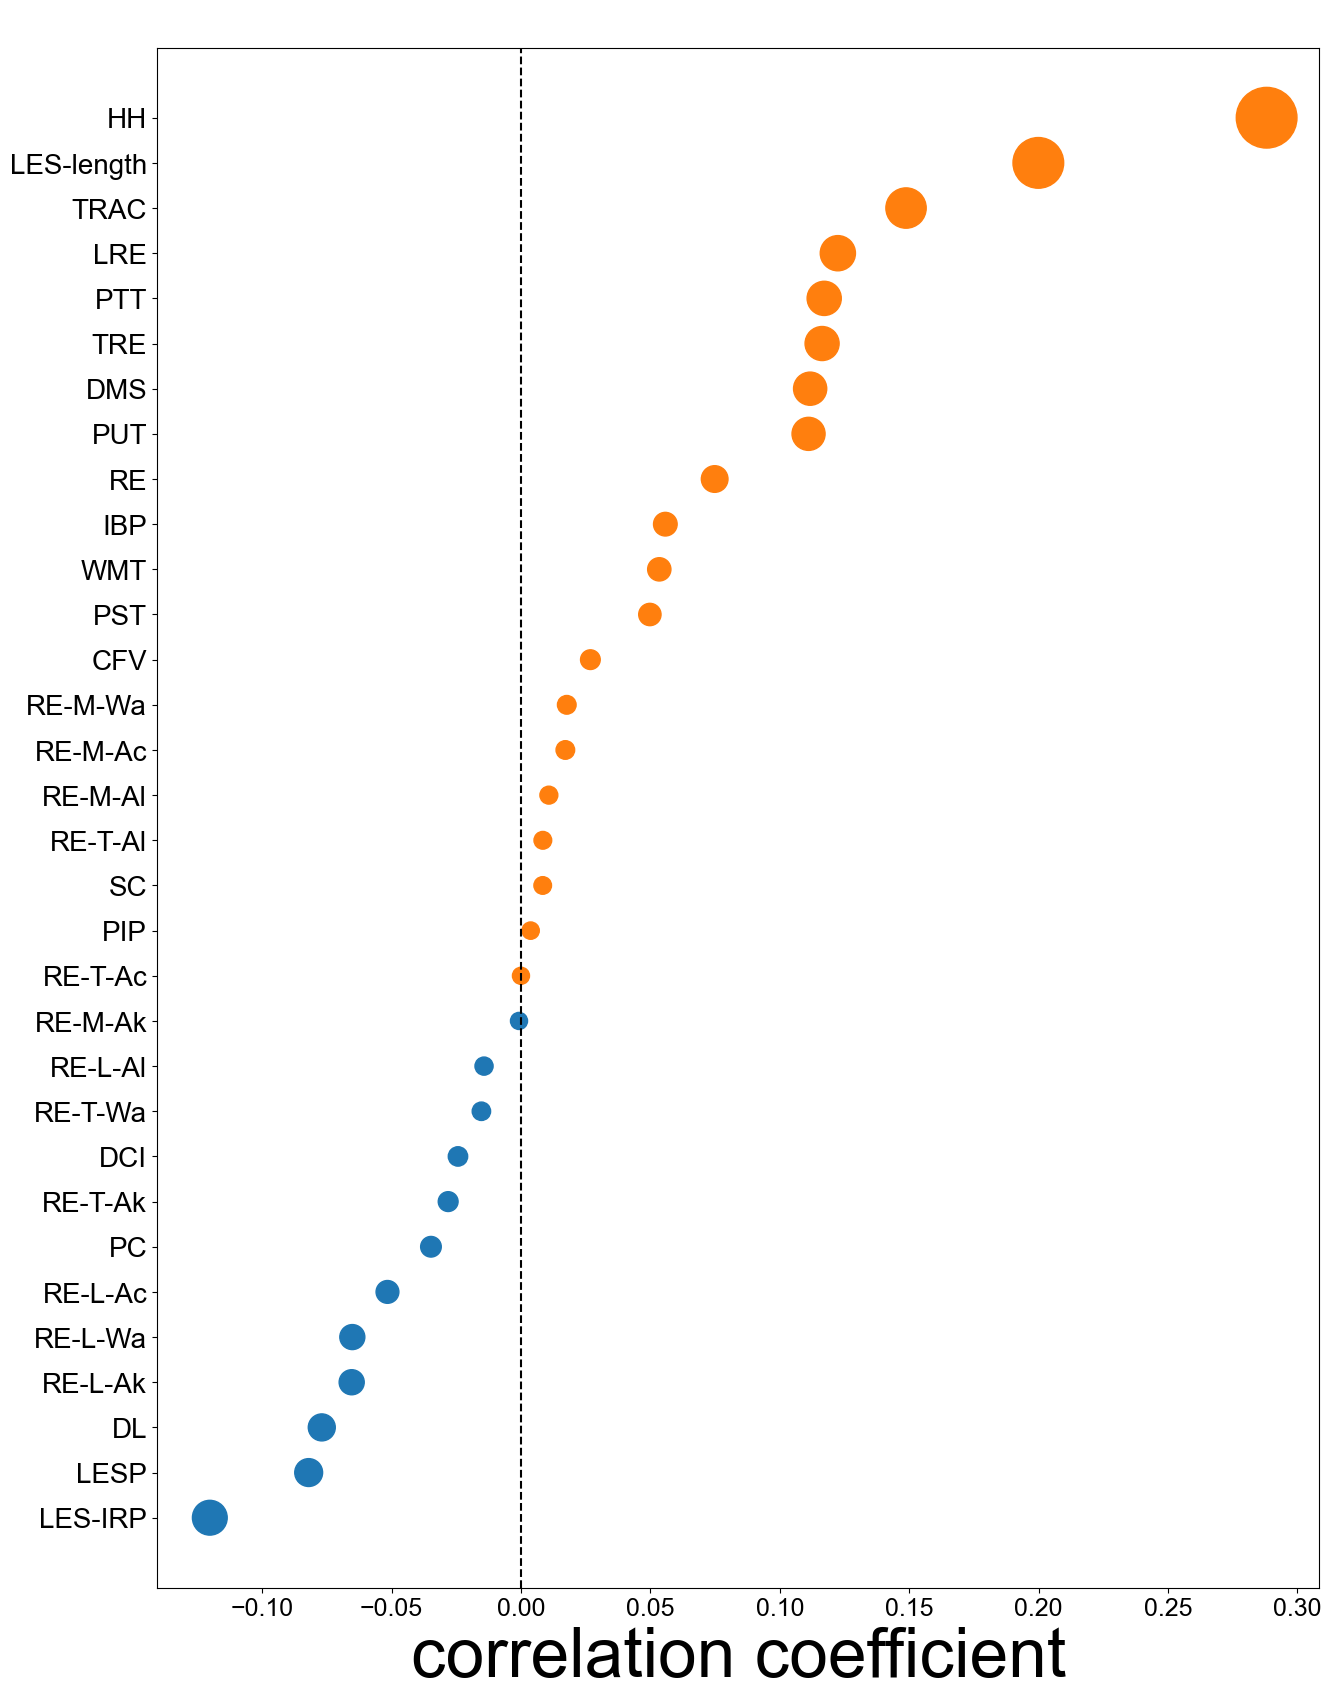

In [17]:
# 正负条形图
import matplotlib.pyplot as plt
import numpy as np

# from sss.util import remove_edge

plt.rcParams['font.sans-serif'] = 'Arial'

def get_chart(right_labels, left_labels, y_labels,ls,rs):
    fig, ax = plt.subplots(figsize=(15, 20))

#     plt.figure(figsize=(10, 20))
    ax.set_facecolor("white")

    ax.spines['bottom'].set_visible(True)#图框下边
    ax.spines['left'].set_visible(True)#图框左边
    ax.spines['top'].set_visible(True)#图框上边
    ax.spines['right'].set_visible(True)#图框右边
#     ax.spines['bottom'].set_linewidth(bwith)#图框下边
#     ax.spines['left'].set_linewidth(bwith)#图框左边
#     ax.spines['top'].set_linewidth(bwith)#图框上边
#     ax.spines['right'].set_linewidth(bwith)#图框右边
    ax.spines['bottom'].set_linestyle("-")
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linestyle("-")
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_linestyle("-")
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_linestyle("-")
    ax.spines['right'].set_color('black')

    a = np.array(right_labels)
    b = np.array(left_labels)

    plt.yticks(range(len(right_labels)), y_labels[::-1],fontsize=20)
    plt.xticks(fontsize=18)
    plt.xlabel('correlation coefficient',fontsize=50)
    plt.title(' ',fontsize=30)
#     print(a)
#     print(b)
    plt.scatter(a, range(len(a)),s = rs)
    plt.scatter(b, range(len(b)),s = ls)
#     plt.vlines(0.08, 0, 32, linestyles='dashed', colors='red')
#     plt.vlines(-0.08, 0, 32, linestyles='dashed', colors='red')
#     plt.scatter(a, range(len(a)))
#     plt.scatter(b, range(len(b)))

#     plt.barh(range(len(a)), a)
#     plt.barh(range(len(b)), b)
    plt.axvline(0, color='black', linestyle='--')
#     plt.legend(('>0.05', '<0.05'),scatterpoints=1,loc='lower right',ncol=1,fontsize=10)
    plt.grid(False)
    plt.show()

if __name__ == '__main__':
    #顺序从小到大排列
    pearson_result_series = spearman["皮尔曼相关性系数"].copy(deep=True)
    size = spearman["p_value"].tolist()
    size = np.array(size)
#     size = (10/(size+1)).tolist()
#     size = (1/size).tolist()
    size = ((np.log2(1/size)*1)*40+150).tolist()
#     size.reverse()
    rs = size[0:12]
#     rs.reverse()
    for i in range(12,32):
        rs.append(0)
    ls = size[12:32]
#     ls.reverse()
    for i in range(0,12):
        ls.insert(0,0)
#     rs.append(800)
    ll = pearson_result_series
#     rl = pearson_result["皮尔逊(Pearson)相关系数"]
    rl = pearson_result_series.copy(deep=True)

#     ls.reverse()
#     rs.reverse()
    rl[rl>0] = 0
    ll[ll<0] = 0
    right_labels = rl.to_list()
    left_labels = ll.to_list()
    y_labels = pearson_result_series.index.to_list()
    y_labels.reverse()
    get_chart(right_labels, left_labels, y_labels,ls,rs)


In [18]:
# X = X.drop(['RE','PST',
#        'RE-L-Wa', 'RE-L-Al','RE-M-Ac',
#        'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak',
#        'PIP','PC',
#        'SC'],axis=1)

In [17]:
X.columns

Index(['WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC'],
      dtype='object')

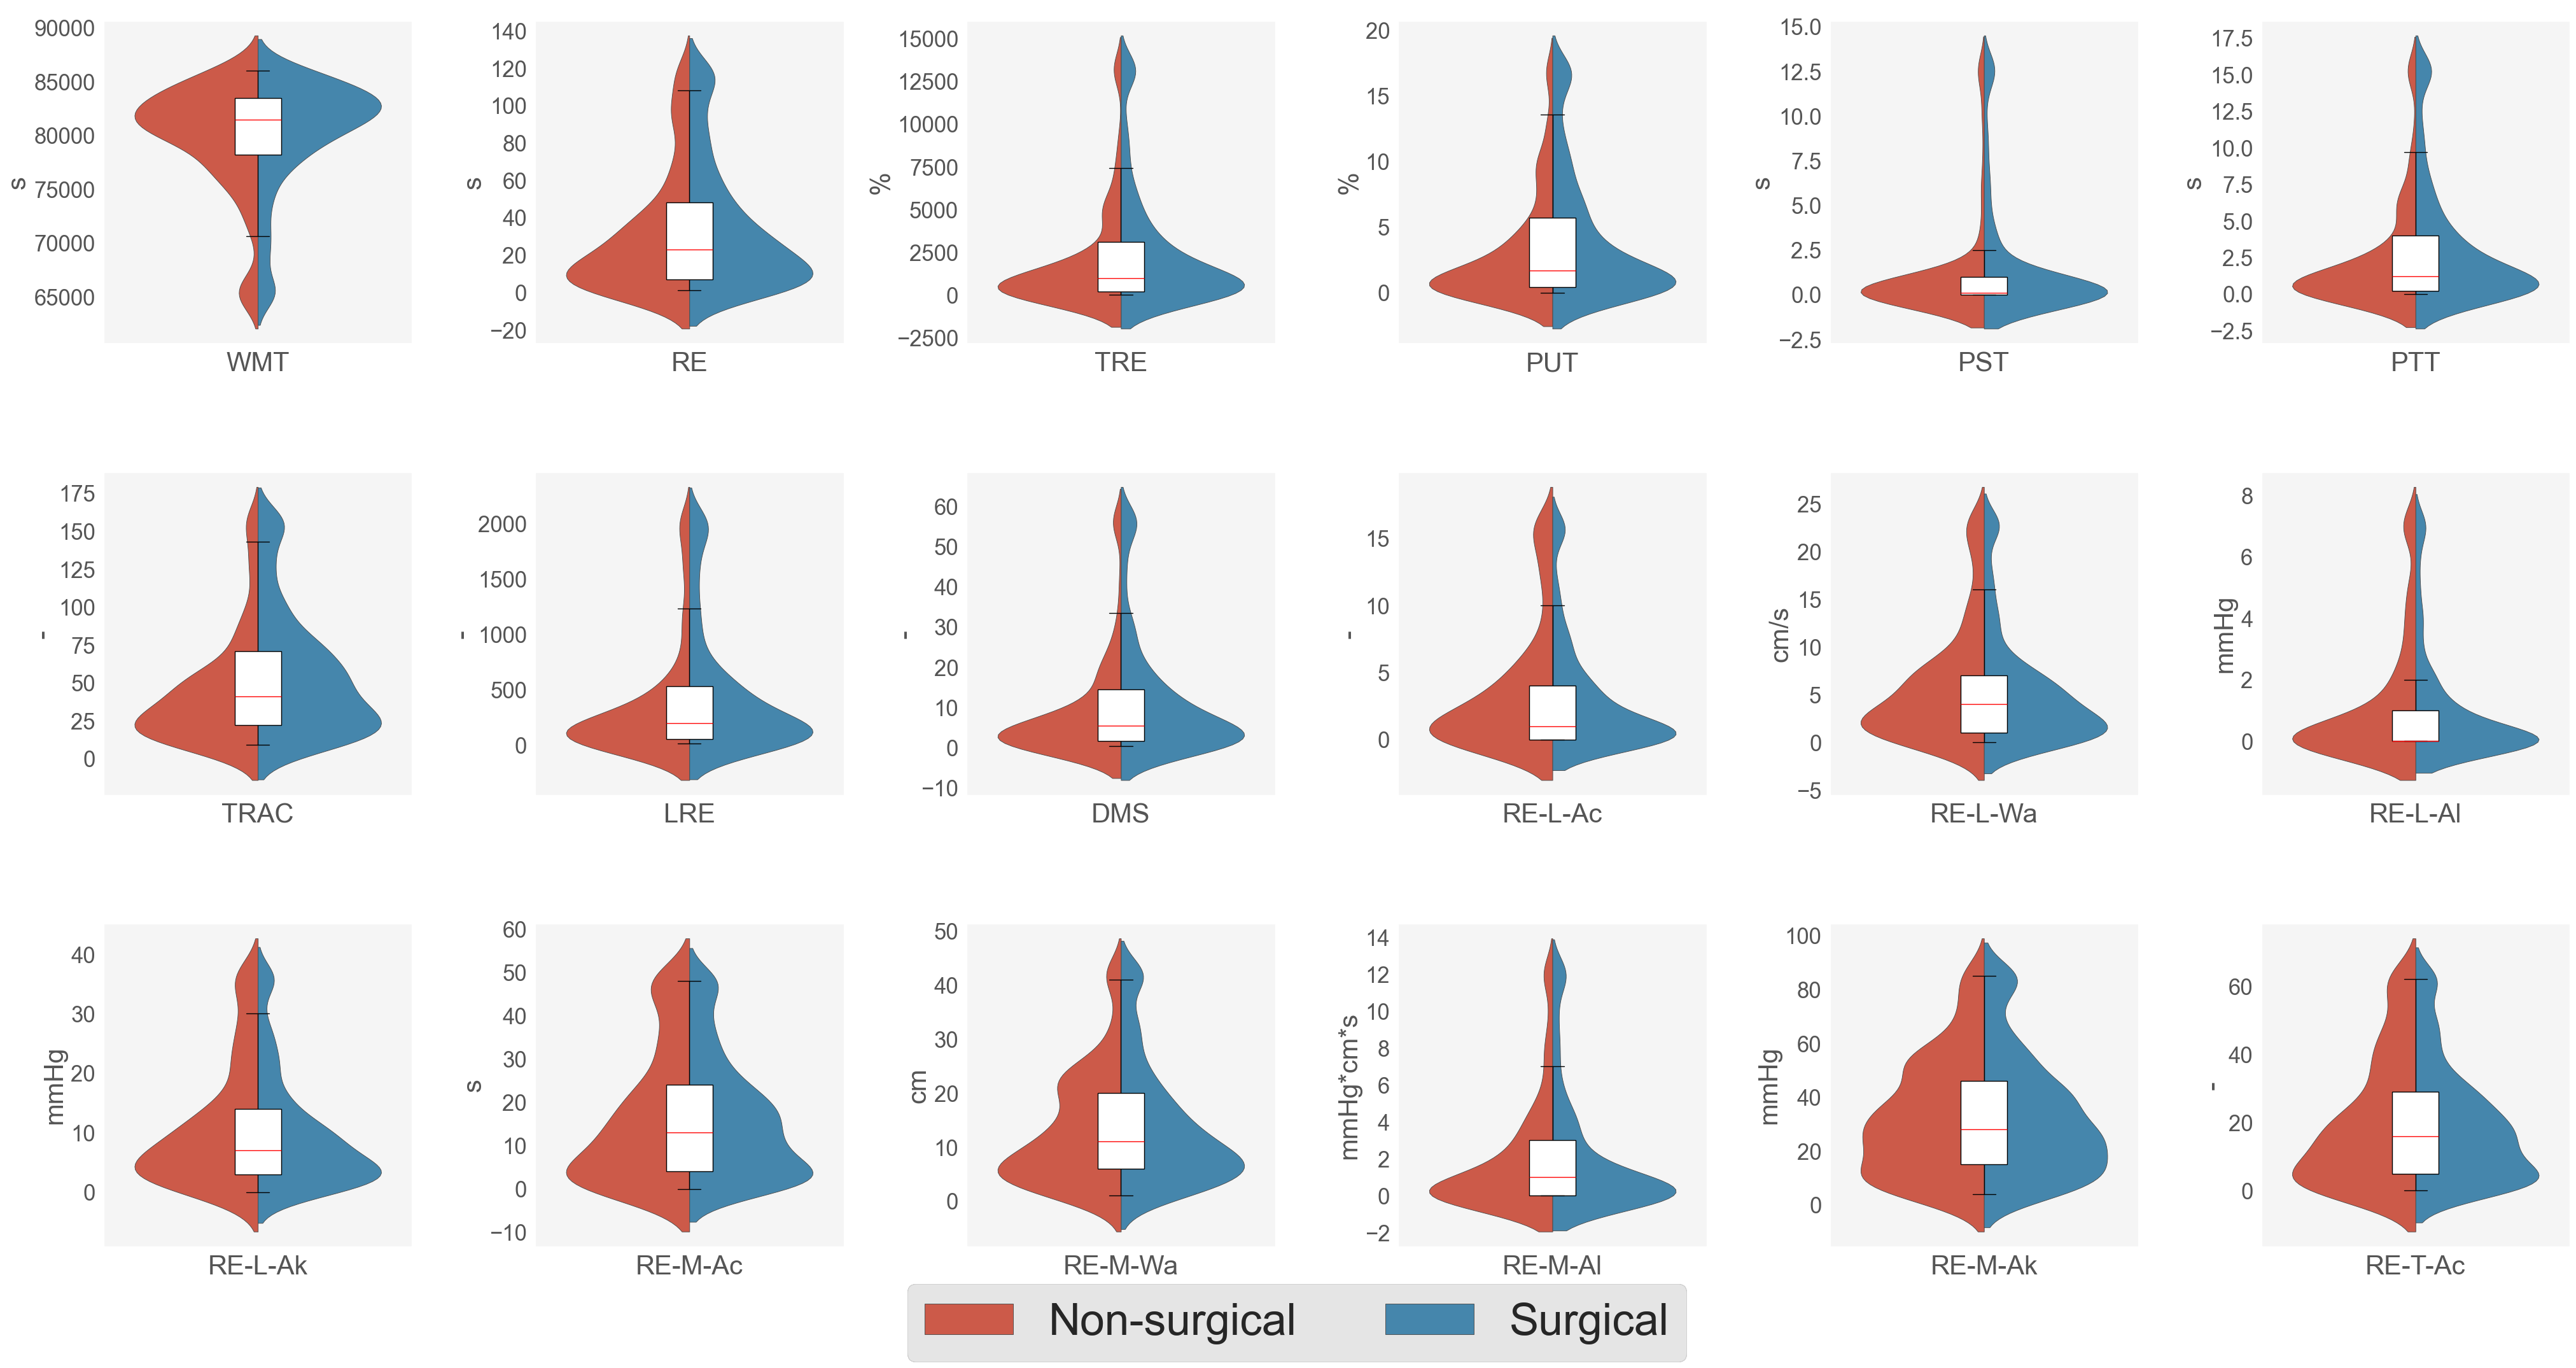

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 重点编写函数

def show_graph(col):
    """
    批量绘制box分布图形， 适用于分类标签的不同指标值的分布数据查看， 对于指标值很多的时候比较适用
    df : DataFrame数据
    lst : 需要绘制图形的字段
    """
    sns.set()
    fig = plt.figure(figsize=(50,25)) # 这里的画布大小还是先设置好吧。
    plt.style.use("ggplot")
    plt.rcParams['font.sans-serif'] = 'Arial'
    legend_handles = None
    legend_labels = ['Non-surgical', 'Surgical']
    # y_title = ['s','-','s','%','%','%','s','s','-','-','-','-','-','-','-','-','-','-','-','-','-','cm/s','mmHg','mmHg','s','mmHg*cm*s','cm','mmHg','cm','-','Frequency (Times)','Frequency (Times)']
    y_title = ['s','s','%','%','s','s','-','-','-','-','cm/s','mmHg','mmHg','s','cm','mmHg*cm*s','mmHg','-']
#    transform=ax.transAxes
    for i in range(1,19):
#         print(i)
        # 遍历每张子图
        data = pd.DataFrame([X[col[i-1]].astype(float),y]).T
        data.columns = ["data","label"]
        data['item'] = col[i-1]
        ax = fig.add_subplot(3, 6, i)
        ax.set_facecolor("#F5F5F5")
        sns.violinplot(x="item", y="data", hue="label",inner=None,
                data=data,split=True, legend=True, ax=ax)
        sns.boxplot(x="item", y="data",data=data,
                width=0.15,color='white',boxprops={'edgecolor': 'black', 'linewidth': 1},
                whiskerprops={'color': 'black'},medianprops={'color': 'red'},capprops={'color': 'black'},showfliers=False)
        # 单独设置了每个子图的标题， 为了方便查看， 也可以省略
        # ax.set_title(col[i-1])
        # ax.set_ylabel("1", fontsize=20)
        # 设置子图之间的横纵边距， 不然会挤到一块， 影响阅读
        plt.subplots_adjust(wspace=0.4,hspace=0.4)
        plt.legend([],[], frameon=False)
        # 在循环结束后添加全局图例
        if i == 1:
            legend_handles, _ = ax.get_legend_handles_labels()
        plt.figlegend(legend_handles, legend_labels, loc='upper center',
             bbox_to_anchor=(0.5, 0.1), fontsize=50,ncol=2, frameon=True)
        plt.xlabel(" ")
        plt.ylabel(y_title[i-1],size=30)
        plt.title(" ")
        plt.grid(False)
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=25)


# 函数调用
cols = X.columns
# 提取需要绘图的字段， 遍历所有字段， 做下判断收入即可
# for ls in list(X.columns.unique()):
#     if ls.startswith('r'):
#         cols.append(ls)
        
show_graph(cols)
plt.savefig('/data/GERD/code/output/image/boxplots_new.svg',dpi=1000)

# 下图为保存在本地的图片


In [18]:
X.columns

Index(['WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE', 'DMS',
       'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC'],
      dtype='object')

In [19]:
spearman

皮尔曼相关性系数       p_value
LES-IRP    -0.120218  2.580529e-04
LESP       -0.082020  1.266134e-02
DL         -0.076956  1.932408e-02
RE-L-Ak    -0.065403  4.713470e-02
RE-L-Wa    -0.065156  4.869535e-02
RE-L-Ac    -0.051575  1.260163e-01
PC         -0.034773  2.953543e-01
RE-T-Ak    -0.028129  3.925785e-01
DCI        -0.024337  4.594443e-01
RE-T-Wa    -0.015286  6.423300e-01
RE-L-Al    -0.014269  7.034835e-01
RE-M-Ak    -0.000755  9.817043e-01
RE-T-Ac    -0.000438  9.893795e-01
PIP         0.003737  9.095495e-01
SC          0.008399  8.312399e-01
RE-T-Al     0.008453  8.041057e-01
RE-M-Al     0.010778  7.576785e-01
RE-M-Ac     0.017147  6.024701e-01
RE-M-Wa     0.017700  5.908605e-01
CFV         0.026825  4.148364e-01
PST         0.049806  1.538638e-01
WMT         0.053442  1.042695e-01
IBP         0.055781  8.997389e-02
RE          0.074843  2.295127e-02
PUT         0.111115  7.371185e-04
DMS         0.111727  6.842446e-04
TRE         0.116346  4.053560e-04
PTT         0.117163  3.753021e-04
LRE         0.122434  1.979555e-04
TRAC        0.148781  6.122021e-06
LES-length  0.199894  1.284964e-09
HH          0.288100  5.885251e-14

In [20]:
col = spearman[((spearman['皮尔曼相关性系数']< -0.08) | (spearman['皮尔曼相关性系数']> 0.08))].index.tolist()

In [21]:
col

['LES-IRP',
 'LESP',
 'PUT',
 'DMS',
 'TRE',
 'PTT',
 'LRE',
 'TRAC',
 'LES-length',
 'HH']

In [22]:
X = X.loc[:,col]

In [23]:
'''数据集划分'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 123, stratify = y)

In [24]:
from collections import Counter
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({1: 502, 0: 238})


In [25]:
'''归一化'''
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [26]:
'''KNN'''
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
## 超参数调优
params = {
    'n_neighbors' : [n for n in range(1,50)],
    'weights' : ['uniform', 'distance'],
    'p': [i for i in range(1,7)]
}
# grid_knn = GridSearchCV(
#     estimator=KNeighborsClassifier(),
#     param_grid = params,
#     n_jobs=-1,
#     cv = 10
# )
# grid_knn.fit(X_train,y_train)
rand_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions = params,
    n_jobs=-1,
    cv = 10
)
rand_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'p': [1, 2, 3, 4, 5, 6],
                                        'weights': ['uniform', 'distance']})

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('LR', LogisticRegression())
    
])
params_lr = {
    'LR__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'LR__penalty': ['l2','l1'],
    'LR__solver': ['liblinear'],
    'LR__max_iter':[10000],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
# grid_lr = GridSearchCV(
#     estimator=pipeline_lr,
#     param_grid=params_lr,
#     n_jobs = -1,
#     cv = 10
# )

# grid_lr.fit(X_train,y_train)
rand_lr = RandomizedSearchCV(
    estimator=pipeline_lr,
    param_distributions = params_lr,
    n_jobs=-1,
    cv = 10
)
rand_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('LR', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'LR__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'LR__max_iter': [10000],
                                        'LR__penalty': ['l2', 'l1'],
                                        'LR__solver': ['liblinear'],
                                        'PolynomialFeatures__degree': [1, 2]})

In [28]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('SVC', SVC(probability=True))
    
])
params_svm = {
    'SVC__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'SVC__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'SVC__kernel': ['rbf'],
#     'SVC__probability':['True'],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
# grid_svm = GridSearchCV(
#     estimator=pipeline_svc,
#     param_grid=params_svm,
#     n_jobs = -1,
#     cv = 10
# )
# grid_svm.fit(X_train,y_train)
rand_svm = RandomizedSearchCV(
    estimator=pipeline_svc,
    param_distributions = params_svm,
    n_jobs=-1,
    cv = 10
)
rand_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('SVC', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'PolynomialFeatures__degree': [1, 2],
                                        'SVC__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'SVC__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'SVC__kernel': ['rbf']})

In [29]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_dt = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params_dt,
#     n_jobs = -1,
#     cv = 10
# )
# grid_dt.fit(X_train,y_train)
rand_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions = params_dt,
    n_jobs=-1,
    cv = 10
)
rand_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9]})

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

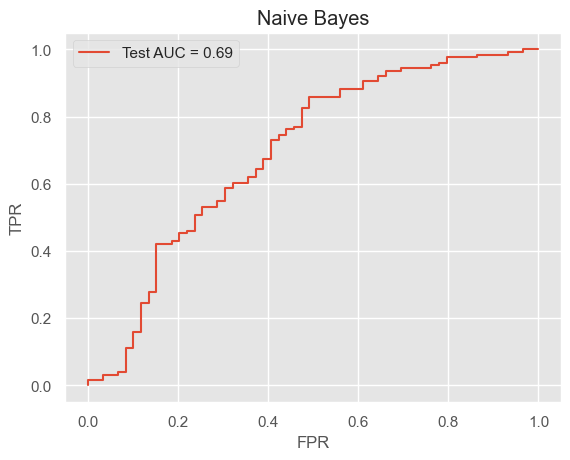

In [39]:
y_score = gnb.predict_proba(X_test)
auc_gnb = roc_auc_score(y_test,y_score[:,1])
fpr_gnb,tpr_gnb,thres_gnb = roc_curve(y_test,y_score[:,1])
## ROC曲线
# matplotlib.rc("font",family='Songti SC')
plt.plot(fpr_gnb,tpr_gnb,label = 'Test AUC = %0.2f' % auc_gnb)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Naive Bayes')
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import VotingClassifier
clf = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True)
]
vclf = VotingClassifier(
    estimators = [
        ('knn', clf[0]),
        ('lr', clf[1]),
        ('dt', clf[2]),
        ('svm',clf[3])
    ],
    voting = 'soft'
)
params = {
    'knn__n_neighbors' : [n for n in range(1,50)],
    'knn__weights' : ['uniform', 'distance'],
    'knn__p': [i for i in range(1,7)],
    'lr__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'lr__penalty': ['l2','l1'],
    'lr__solver': ['liblinear'],
    'lr__max_iter':[10000],
    'lr__multi_class':['multinomial','ovr'],
    'svm__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'svm__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'svm__kernel': ['rbf'],
    'dt__max_depth': [i for i in range(3,10)],
    'dt__min_samples_split' : [i for i in range(3,10)],
    'dt__min_samples_leaf': [i for i in range(3,10)],
    'dt__criterion':['gini', 'entropy', 'log_loss']
    }
from sklearn.model_selection import RandomizedSearchCV 
 
random_cv = RandomizedSearchCV( 
    vclf, params, n_iter=1000, cv=10, scoring="neg_log_loss", n_jobs=-1
)

random_cv.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as pr

RandomizedSearchCV(cv=10,
                   estimator=VotingClassifier(estimators=[('knn',
                                                           KNeighborsClassifier()),
                                                          ('lr',
                                                           LogisticRegression()),
                                                          ('dt',
                                                           DecisionTreeClassifier()),
                                                          ('svm',
                                                           SVC(probability=True))],
                                              voting='soft'),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'dt__min_samples_leaf': [3, 4,...
                                        'lr__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'lr__max_iter': [10000],
                                        'lr__multi_class': ['multinomial',
                                                            'ovr'],
                                        'lr__penalty': ['l2', 'l1'],
                                        'lr__solver': ['liblinear'],
                                        'svm__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'svm__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'svm__kernel': ['rbf']},
                   scoring='neg_log_loss')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
        'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
        'max_samples':[40,50,60,70,80,90,100,120,140],
        'max_depth': [i for i in range(3,10)],
        'min_samples_split' : [i for i in range(3,10)],
        'min_samples_leaf': [i for i in range(3,10)],
        'criterion':['gini', 'entropy', 'log_loss']
    }
# grid_rf = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_rf.fit(X_train,y_train)
rand_rf = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions = params_rf,
        n_jobs=-1,
        cv = 10
    )
rand_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]})

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(oob_score=True,random_state=123,bootstrap=True)
params_rf = {
    'n_estimators': [200],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_et = GridSearchCV(
#     estimator=et_clf,
#     param_grid=params_rf,
#     n_jobs = -1,
#     cv = 10
# )
# grid_et.fit(X_train,y_train)
rand_et = RandomizedSearchCV(
    estimator=et_clf,
    param_distributions = params_rf,
    n_jobs=-1,
    cv = 10
)
rand_et.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=ExtraTreesClassifier(bootstrap=True,
                                                  oob_score=True,
                                                  random_state=123),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [1, 3, 5, 7, 10, 20, 30,
                                                        40, 50, 60, 70, 80, 90,
                                                        100, 120],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [200]})

In [34]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(
    n_estimators = 200,
    bootstrap=True,
    oob_score=True,
    bootstrap_features=True,
    random_state=123
)
params_bagging = {
    'estimator':[DecisionTreeClassifier(),SVC(probability=True),LogisticRegression(),KNeighborsClassifier()],
    'max_features':[i for i in range(1,10)],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
#     'max_depth': [i for i in range(3,10)],
#     'min_samples_split' : [i for i in range(3,10)],
#     'min_samples_leaf': [i for i in range(3,10)],
#     'criterion':['gini', 'entropy', 'log_loss']
}
random_bagging = GridSearchCV( 
    bagging, params_bagging,  cv=10,  n_jobs=16 
)

random_bagging.fit(X_train,y_train)
# random_bagging = RandomizedSearchCV( 
#     bagging, params_bagging,  cv=10,  n_jobs=16 
# )

# random_bagging.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
629 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
449 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/base.py", 

GridSearchCV(cv=10,
             estimator=BaggingClassifier(bootstrap_features=True,
                                         n_estimators=200, oob_score=True,
                                         random_state=123),
             n_jobs=16,
             param_grid={'estimator': [DecisionTreeClassifier(),
                                       SVC(probability=True),
                                       LogisticRegression(),
                                       KNeighborsClassifier()],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_samples': [1, 3, 5, 7, 10, 20, 30, 40, 50, 60, 70,
                                         80, 90, 100, 120]})

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=200
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

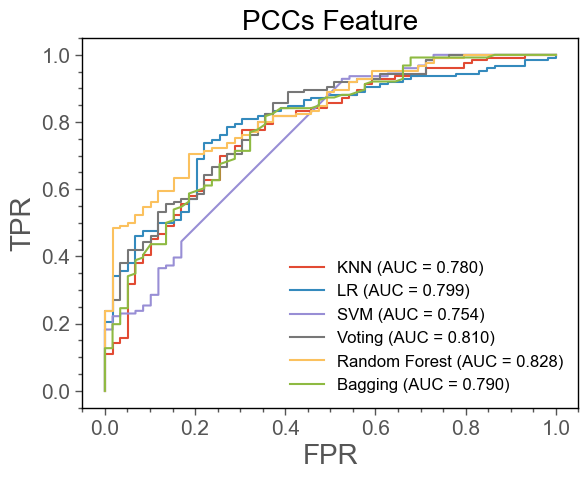

In [46]:
fig, ax = plt.subplots()

plt.style.use("ggplot")
# plt.rcParams.update({'font.size':20})
plt.rcParams['font.sans-serif'] = 'Arial'

y_decition_rf = rand_rf.best_estimator_.predict_proba(X_test)
auc_rf = roc_auc_score(y_test,y_decition_rf[:,1])
fpr_rf,tpr_rf,thres_rf = roc_curve(y_test,y_decition_rf[:,1])
plt.plot(fpr_rf,tpr_rf,label = 'KNN (AUC = %0.3f)' % auc_rf)

y_decition_lr = rand_lr.best_estimator_.decision_function(X_test)
auc_log = roc_auc_score(y_test,y_decition_lr)
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_decition_lr)
plt.plot(fpr_log,tpr_log,label = 'LR (AUC = %0.3f)' % auc_log)

y_decition_svm = rand_svm.best_estimator_.decision_function(X_test)
auc_svm = roc_auc_score(y_test,y_decition_svm)
fpr_svm,tpr_svm,thres_svm = roc_curve(y_test,y_decition_svm)
plt.plot(fpr_svm,tpr_svm,label = 'SVM (AUC = %0.3f)' % auc_svm)


y_score_knn = rand_knn.best_estimator_.predict_proba(X_test)
auc_knn_knn = roc_auc_score(y_test,y_score_knn[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score_knn[:,1])
plt.plot(fpr_knn,tpr_knn,label = 'Voting (AUC = %0.3f)' % auc_knn_knn)

y_decition_vo = random_cv.best_estimator_.predict_proba(X_test)
auc_vo = roc_auc_score(y_test,y_decition_vo[:,1])
fpr_vo,tpr_vo,thres_vo = roc_curve(y_test,y_decition_vo[:,1])
## ROC曲线
plt.plot(fpr_vo,tpr_vo,label = 'Random Forest (AUC = %0.3f)' % auc_vo)

y_decition_bagging = random_bagging.best_estimator_.predict_proba(X_test)
auc_bagging = roc_auc_score(y_test,y_decition_bagging[:,1])
fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,y_decition_bagging[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'Bagging (AUC = %0.3f)' % auc_bagging)

# y_decition_v1 = rand_rf_new.best_estimator_.predict_proba(X_new)
# auc_v1 = roc_auc_score(y_new,y_decition_v1[:,1])
# fpr_v1,tpr_v1,thres_v1 = roc_curve(y_new,y_decition_v1[:,1])
# ## ROC曲线
# plt.plot(fpr_v1,tpr_v1,label = 'External Validation AUC = %0.2f' % auc_v1)

# ax = plt.gca()#获取边框
bwith = 1
#设置边框
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)
# #取消边框
# ax.spines['top'].set_color('black')  # 设置上‘脊梁’为红色
# ax.spines['right'].set_color('black')  # 设置上‘脊梁’为无色
# ax.spines['bottom'].set_color('black') 
# ax.spines['left'].set_color('black') 


# ax.spines['bottom'].set_linewidth(bwith)#图框下边
# ax.spines['left'].set_linewidth(bwith)#图框左边
# ax.spines['top'].set_linewidth(bwith)#图框上边
# ax.spines['right'].set_linewidth(bwith)#图框右边

plt.grid(False)   
ax.set_facecolor("white")
ax.set_xlabel('FPR',fontsize=20)
ax.set_ylabel('TPR',fontsize=20)
plt.legend(frameon=False,fontsize=12)
plt.title('PCCs Feature',fontsize=20)
plt.savefig('PCCs.svg',dpi=1000)
plt.show()

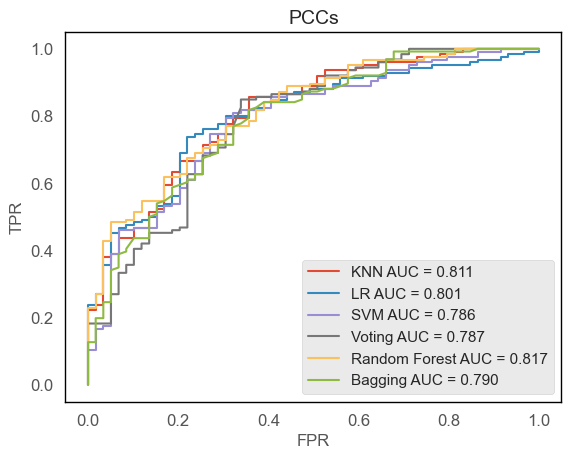

In [47]:
fig,ax= plt.subplots()

bwith = 1
plt.style.use("ggplot")
plt.rcParams['font.sans-serif'] = 'Arial'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=12)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=10)

y_score_knn = rand_knn.best_estimator_.predict_proba(X_test)
auc_knn = roc_auc_score(y_test,y_score_knn[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score_knn[:,1])
plt.plot(fpr_knn,tpr_knn,label = 'KNN AUC = %0.3f' % auc_knn)

y_decition_lr = rand_lr.best_estimator_.decision_function(X_test)
auc_log = roc_auc_score(y_test,y_decition_lr)
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_decition_lr)
plt.plot(fpr_log,tpr_log,label = 'LR AUC = %0.3f' % auc_log)

y_decition_rf = rand_rf.best_estimator_.predict_proba(X_test)
auc_rf = roc_auc_score(y_test,y_decition_rf[:,1])
fpr_rf,tpr_rf,thres_rf = roc_curve(y_test,y_decition_rf[:,1])
## ROC曲线
plt.plot(fpr_rf,tpr_rf,label = 'SVM AUC = %0.3f' % auc_rf)

y_decition_svm = rand_svm.best_estimator_.decision_function(X_test)
auc_svm = roc_auc_score(y_test,y_decition_svm)
fpr_svm,tpr_svm,thres_svm = roc_curve(y_test,y_decition_svm)
plt.plot(fpr_svm,tpr_svm,label = 'Voting AUC = %0.3f' % auc_svm)
                                      

y_decition_vo = random_cv.best_estimator_.predict_proba(X_test)
auc_vo = roc_auc_score(y_test,y_decition_vo[:,1])
fpr_vo,tpr_vo,thres_vo = roc_curve(y_test,y_decition_vo[:,1])
plt.plot(fpr_vo,tpr_vo,label = 'Random Forest AUC = %0.3f' % auc_vo)


y_decition_bagging = random_bagging.best_estimator_.predict_proba(X_test)
auc_bagging = roc_auc_score(y_test,y_decition_bagging[:,1])
fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,y_decition_bagging[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'Bagging AUC = %0.3f' % auc_bagging)

plt.grid(False)

plt.xlabel('FPR',fontsize=12)
plt.ylabel('TPR',fontsize=12)
plt.legend()
plt.title('PCCs',fontsize=14)
# plt.savefig('PCCs.svg',dpi=1000)
plt.show()

In [38]:
import joblib
joblib.dump(grid_rf.best_estimator_, 'saved_model/pccs_rf.pkl')

['saved_model/pccs_rf.pkl']

In [ ]:

auc_rf

In [ ]:
X_all = df.loc[:,col]
X_all.replace('YES',1,inplace=True)
X_all.replace('NO',0,inplace=True)
X_all.replace('1.#J',1.0,inplace=True)
X_all.replace('--',0,inplace=True)
X_all.replace('-',0,inplace=True)
X_train = standard_scaler.transform(X_all)
y_decition = random_cv.best_estimator_.predict_proba(X_train)

In [ ]:
y_1 = pd.DataFrame(y_decition)
out = pd.concat([y_1,df['Name']],axis=1)

In [41]:
out

0         1 Name
0    0.722473  0.277527  李跃华
1    0.019877  0.980123   张延
2    0.019917  0.980083   张延
3    0.036812  0.963188   张延
4    0.036899  0.963101   张延
..        ...       ...  ...
920  0.075590  0.924410  杨淑芳
921  0.044943  0.955057  芮雪梅
922  0.173060  0.826940  张淑珍
923  0.743239  0.256761  朱维静
924  0.103299  0.896701  陈德普

[925 rows x 3 columns]

In [36]:
out.to_csv('./PCCs_out.csv')

In [38]:
out

0         1 Name
0    0.159917  0.840083  李跃华
1    0.131000  0.869000   张延
2    0.131000  0.869000   张延
3    0.152667  0.847333   张延
4    0.152667  0.847333   张延
..        ...       ...  ...
920  0.161310  0.838690  杨淑芳
921  0.145476  0.854524  芮雪梅
922  0.140583  0.859417  张淑珍
923  0.163917  0.836083  朱维静
924  0.122476  0.877524  陈德普

[925 rows x 3 columns]

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict =  grid_rf.best_estimator_.predict(X_test)
# cm = confusion_matrix(y_train,y_predict)
# print(cm)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.745945945945946
0.7581699346405228
0.9206349206349206
0.8315412186379929


In [143]:
a =  grid_rf.best_estimator_.predict_proba(X_test)
a = pd.DataFrame(a)
a.to_excel('./PCCs_res.xlsx')

In [162]:
c = pd.read_excel('./lasso_res.xlsx')

In [177]:
b = pd.read_excel('./our.xlsx')

In [145]:
pro = 0.7*b['exoprt']+0.2*b['PCCs']+0.1*b['RFE']

In [146]:
la = pro.apply(lambda x: if)

SyntaxError: invalid syntax (1083116587.py, line 1)

In [147]:
# y_predict =  grid_rf.best_estimator_.predict(X_test) 
cm = confusion_matrix(b['label'],pro)
print(cm)
print(accuracy_score(b['label'],pro))
print(precision_score(b['label'],pro))
print(recall_score(b['label'],pro))
print(f1_score(b['label'],pro))

NameError: name 'confusion_matrix' is not defined

In [215]:
pro = (1.26782345*b['exoprt']+0.69267517*b['lasso']-0.66314059*b['PCCs']+0.0502186*b['RFE'])/1
roc_auc_score(b['label'],pro)

0.8256658595641647

In [216]:
pro

0      0.699716
1      0.883811
2      1.237528
3      0.978340
4      0.775113
         ...   
180    0.679389
181    0.512040
182    0.764445
183    0.902619
184    0.880286
Length: 185, dtype: float64

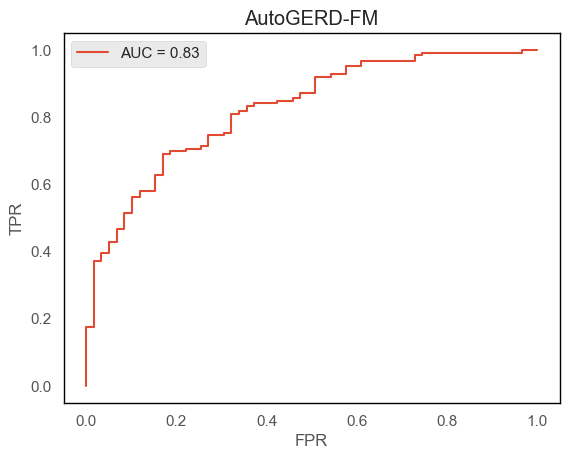

In [230]:
fig,ax= plt.subplots()

bwith = 1
ax = plt.gca()
plt.rcParams['font.sans-serif'] = 'Arial'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3)

fpr_bagging,tpr_bagging,thres_bagging = roc_curve(b['label'],pro)
plt.plot(fpr_bagging,tpr_bagging,label = 'AUC = %0.2f' % roc_auc_score(b['label'],pro))
plt.grid(False)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('AutoGERD-FM')
plt.show()

In [179]:
b = b[['exoprt','PCCs','RFE','label','res']]

In [180]:
b = pd.concat([b,c[1]],axis=1)

In [184]:
b.columns=['exoprt', 'PCCs', 'RFE', 'label', 'res', 'lasso']

In [188]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(b[['exoprt','lasso','PCCs','RFE']],b['label'])

LinearRegression()

In [189]:
lr_model.coef_

array([ 1.26782345,  0.69267517, -0.66314059,  0.0502186 ])

In [198]:
test_ = pd.read_excel('./test.xlsx',index_col=0)
test_= test_.T
test_ = test_.loc[:,col]
X_a =  standard_scaler.transform(test_)
ans = grid_rf.best_estimator_.predict_proba(X_a)

In [211]:
pro = (1.26782345*n_i['exoprt']+0.69267517*n_i['lasso']-0.66314059*n_i['PCCs']+0.0502186*n_i['RFE'])/1
pro

0    0.405703
1    1.183296
dtype: float64

In [1]:
list_n = [[0.32,0.83],[0.32,0.83],[0.36,0.73],[0.34,0.80]]

In [2]:
n_i = pd.DataFrame(list_n)

NameError: name 'pd' is not defined

In [209]:
n_i = n_i.T

In [210]:
n_i.columns = ['exoprt','lasso','PCCs','RFE']

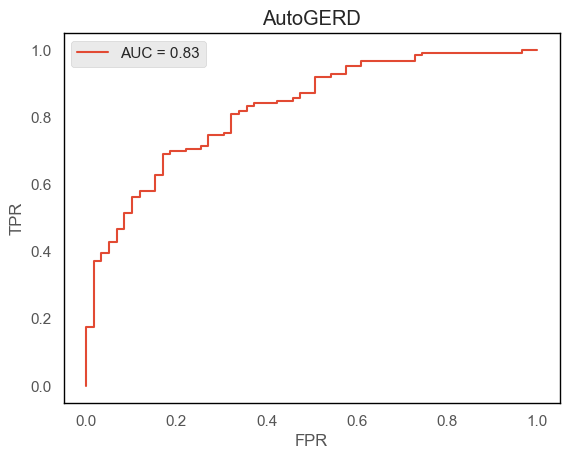

In [237]:
fig,ax= plt.subplots()

bwith = 1
ax = plt.gca()
plt.rcParams['font.sans-serif'] = 'Arial'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3)

fpr_bagging,tpr_bagging,thres_bagging = roc_curve(b['label'],pro)
plt.plot(fpr_bagging,tpr_bagging,label = 'AUC = %0.2f' % roc_auc_score(b['label'],pro))
plt.grid(False)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('AutoGERD')
plt.show()

In [223]:
nf = pd.read_csv('./南方医科大学深圳医院测酸测压数据.csv',index_col=0)

In [224]:
col

['LES-IRP',
 'LESP',
 'PUT',
 'DMS',
 'TRE',
 'PTT',
 'LRE',
 'TRAC',
 'LES-length',
 'HH']

In [225]:
nf.columns

Index(['患者', 'LA', 'HH', 'label', 'LESP', 'LES-IRP', 'WMT', 'TRE', 'PUT',
       'TRAC', 'LRE', 'DMS', 'RE-L-Ak', 'RE-M-Wa', 'RE-M-Ak', 'RE-T-Ac',
       'RE-T-Wa', 'RE-T-Ak'],
      dtype='object')

In [226]:
X_new = nf.loc[:,['PUT','LES-IRP','HH','DMS','TRE','LRE','TRAC']]

y_new = nf['label']

In [227]:
X = df.loc[:,['PUT','LES-IRP','HH','DMS','TRE','LRE','TRAC']]

y = df['label']

In [228]:
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)

In [229]:
'''归一化'''
'''数据集划分'''
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_train = standard_scaler.transform(X)
X_test = standard_scaler.transform(X_new)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
random_cv = RandomizedSearchCV( 
    vclf, params, n_iter=10000, cv=10, scoring="roc_auc", n_jobs=-1
)

random_cv.fit(X_train,y_train)

In [212]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict =  grid_rf.best_estimator_.predict(X_test)
# cm = confusion_matrix(y_train,y_predict)
# print(cm)
print(accuracy_score(y_new,y_predict))
print(precision_score(y_new,y_predict))
print(recall_score(y_new,y_predict))
print(roc_auc_score(y_new,y_predict))

NameError: name 'y_new' is not defined

In [157]:
y_decition_v1 = grid_rf.best_estimator_.predict_proba(X_test)
roc_auc_score(y_new,y_decition_v1[:,1])

0.9008620689655172

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from current font.
  fig.canvas.print_figure(bytes_

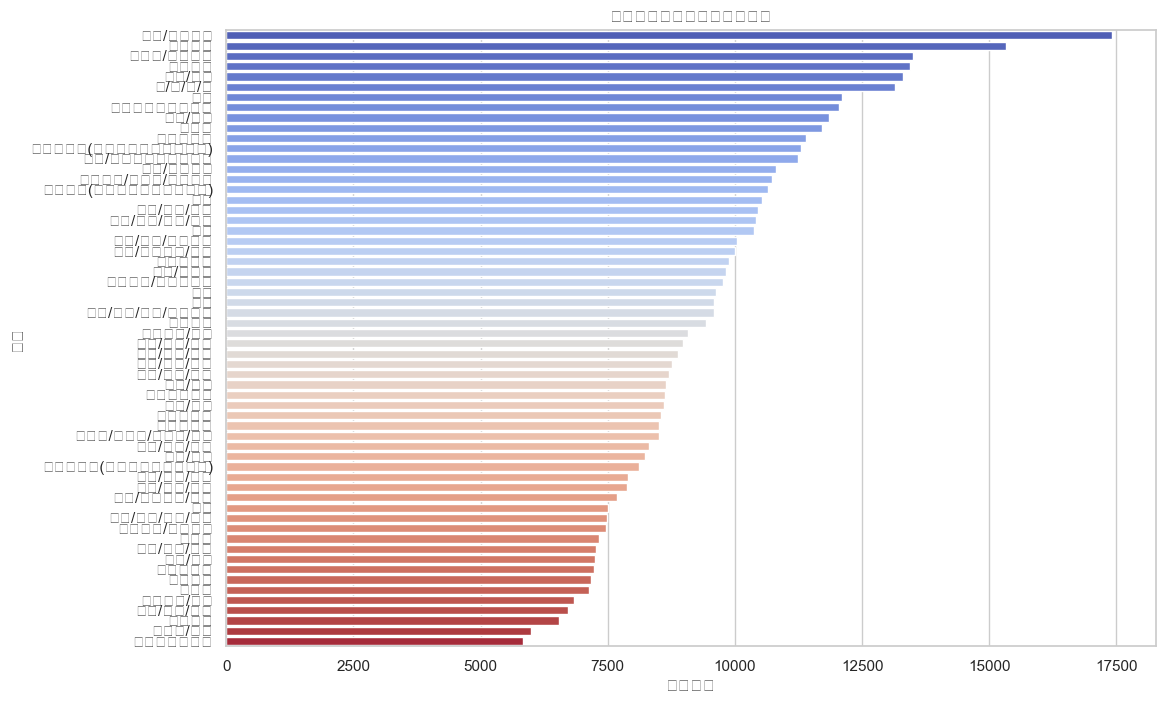

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据

data_path = '../tmp/data1.csv'  # 请替换为您的文件路径
data = pd.read_csv(data_path)

# 设置Matplotlib支持中文显示

plt.rcParams['font.sans-serif'] = ['SimHei']

# 计算不同行业的平均薪资
industry_salary = data.groupby("行业")['Unnamed: 10'].mean().sort_values(ascending=False)

# 使用Seaborn绘制条形图
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_salary.values, y=industry_salary.index, palette="coolwarm")
plt.title('不同行业的平均薪资水平分布')
plt.xlabel('平均薪资')
plt.ylabel('行业')
plt.show()